In [2]:
# import pandas and csv file
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('train.csv')

# Eliminating Columns with high proportion of missing values

In [4]:
# inspect null values in each column
data[data.isnull() > 0].head()
null_cols = data.columns[data.isnull().any()].tolist()
null_cols # return columns containing null values

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

### Examine columns where there is little to no variation between values

In [5]:
low_variance = []

for col in data._get_numeric_data():
    minimum = min(data[col])
    ninety_perc = np.percentile(data[col], 90)
    if ninety_perc == minimum:
        low_variance.append(col)

print(low_variance)

# add more columns with low variance by observation using value_counts() functions

low_variance  = low_variance + ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'Utilities', 'Id' ]

['LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


/home/fred/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [6]:
# Replace nulls with known values

def columnCleanser(df, column, expr):
    df[column] = np.where(df[column].isnull(), expr , df[column])
    return df[column]


data['FireplaceQu'] = columnCleanser(data, 'FireplaceQu', 'No Fireplace')
data['MasVnrType'] = columnCleanser(data, 'MasVnrType', 'None')
data['MasVnrArea'] = columnCleanser(data,'MasVnrArea', 0 )
data['BsmtQual'] = columnCleanser(data, 'BsmtQual', 'No Basement')
data['BsmtCond'] = columnCleanser(data, 'BsmtCond', 'No Basement')
data['BsmtExposure'] = columnCleanser(data, 'BsmtExposure', 'No Basement')
data['BsmtFinType1'] = columnCleanser(data, 'BsmtFinType1', 'No Basement')
data['BsmtFinType2'] = columnCleanser(data, 'BsmtFinType2', 'No Basement')
data['GarageType'] = columnCleanser(data, 'GarageType', 'No Garage')
data['GarageYrBlt'] = columnCleanser(data, 'GarageYrBlt', 'No Garage')
data['GarageFinish'] = columnCleanser(data, 'GarageFinish', 'No Garage')
data['GarageQual'] = columnCleanser(data, 'GarageQual', 'No Garage')
data['GarageCond'] = columnCleanser(data, 'GarageCond', 'No Garage')

In [7]:
# drop cols with low variance
before = data.shape
data = data.drop(low_variance, axis=1)
data = data.fillna(0.0) # replaces remaining NaN values in LotFrontage with 0.0
print('Before:\n', before, '\nAfter:\n', data.shape)

Before:
 (1460, 81) 
After:
 (1460, 69)


In [8]:
#data.isnull().sum()

In [9]:
data.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

### Summary stats output

In [10]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1460.0,57.623288,34.664304,0.0,42.00,63.0,79.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [11]:
numeric = data._get_numeric_data()
# drop categorical columns, columns with many repeating zeros
numeric = numeric.drop(['YearRemodAdd', 'YearBuilt', 'YrSold', 'MoSold', 'OverallQual', 'OverallCond',
                       'EnclosedPorch', 'MSSubClass', ], axis=1)
numeric.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,...,1,3,1,8,0,2,548,0,61,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,...,0,3,1,6,1,2,460,298,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,...,1,3,1,6,1,2,608,0,42,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,...,0,3,1,7,1,3,642,0,35,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,...,1,4,1,9,1,3,836,192,84,250000


In [12]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(numeric)
scaled = transformer.transform(numeric)
scaled = pd.DataFrame(scaled)
scaled.columns = numeric.columns 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce0c600a20>,
      dtype=object)

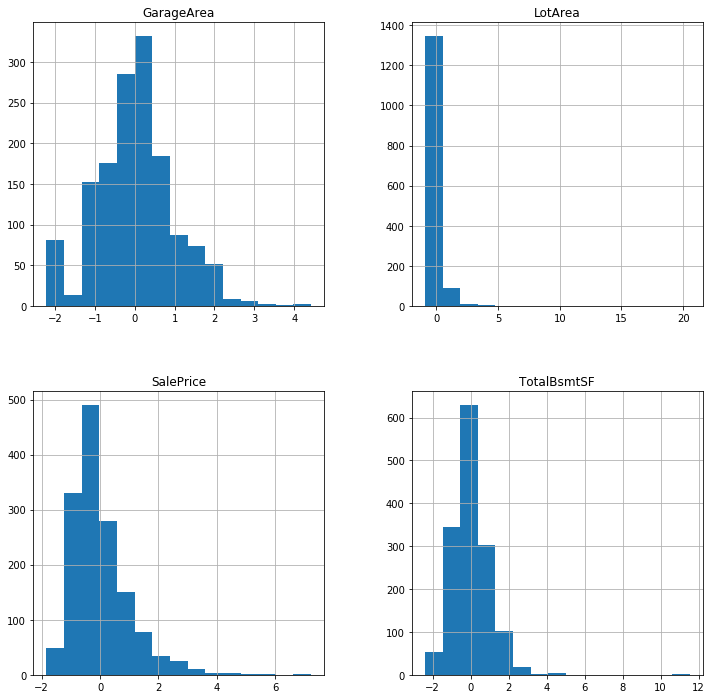

In [18]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

scaled[['SalePrice', 'LotArea', 'GarageArea', 'TotalBsmtSF']].hist(figsize =(12,12), bins =15)

In [19]:
# examine correlations
correlations = [scaled['SalePrice'].corr(scaled[column]) for column in scaled.columns]
variable_names = [column for column in scaled.columns]
corr_df = pd.DataFrame([variable_names, correlations]).transpose().sort_values(by=1, ascending=False).reset_index(drop=True)

In [20]:
corr_df[1:] # correlations sorted (numeric)

,0,1
1,GrLivArea,0.708624
2,GarageCars,0.640409
3,GarageArea,0.623431
4,TotalBsmtSF,0.613581
5,1stFlrSF,0.605852
6,FullBath,0.560664
7,TotRmsAbvGrd,0.533723
8,MasVnrArea,0.472614
9,Fireplaces,0.466929
10,BsmtFinSF1,0.38642


In [21]:
# Heatmap to check for collinearity thresh = .98


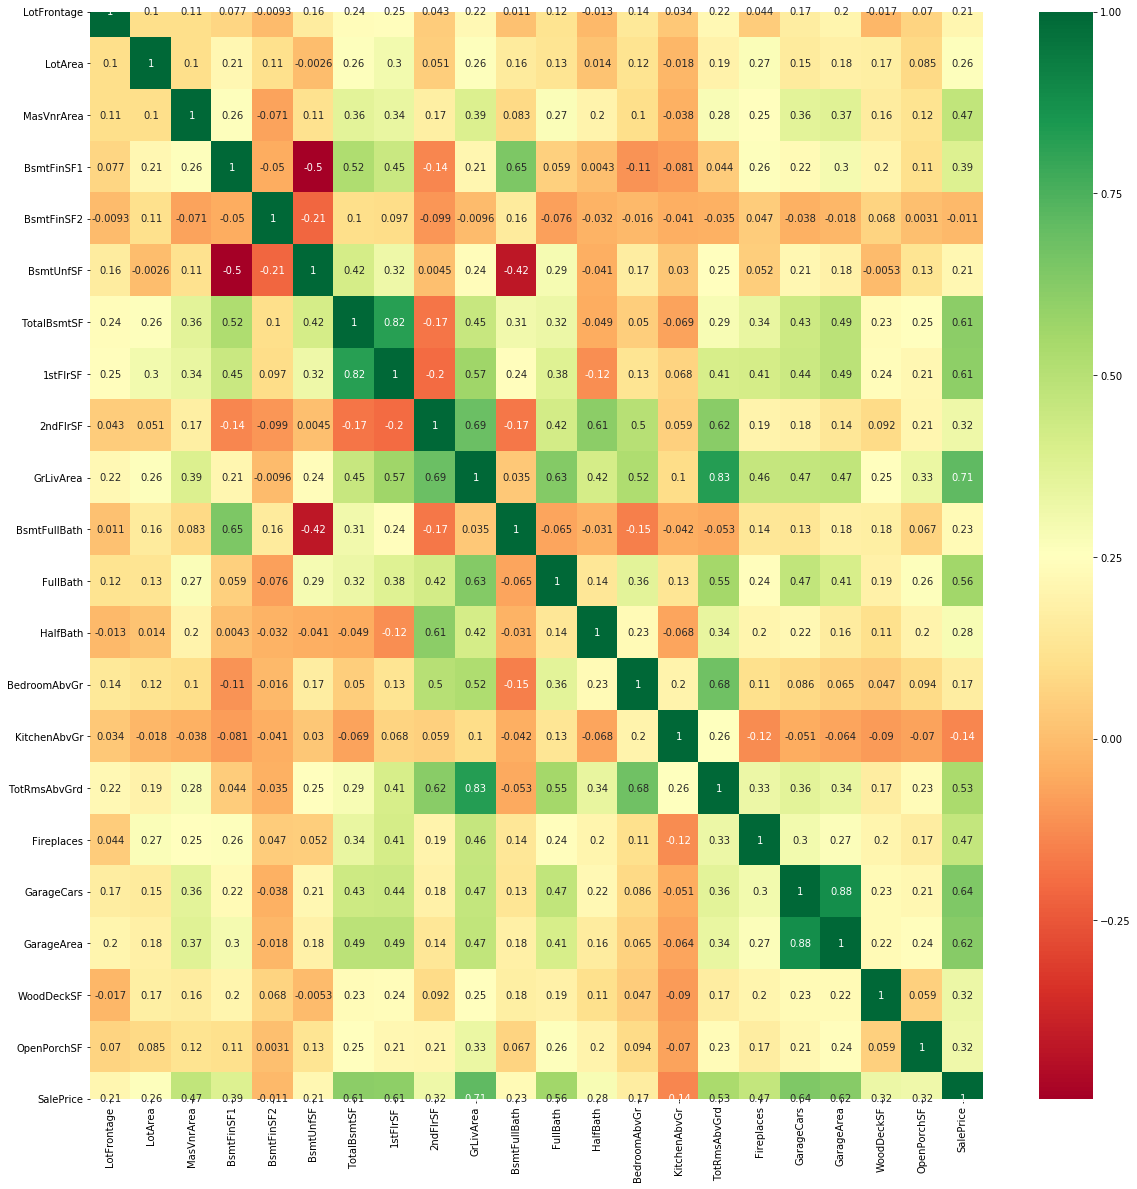

In [22]:
import seaborn as sns

X = scaled[corr_df[1:][0].values] # Independent columns
Y = pd.DataFrame(scaled, columns = ['SalePrice'])# Target

corrMatrix = scaled.corr()
topFeatures = corrMatrix.index
plt.figure(figsize = (20,20))
g = sns.heatmap(scaled[topFeatures].corr(), annot=True, cmap = "RdYlGn")

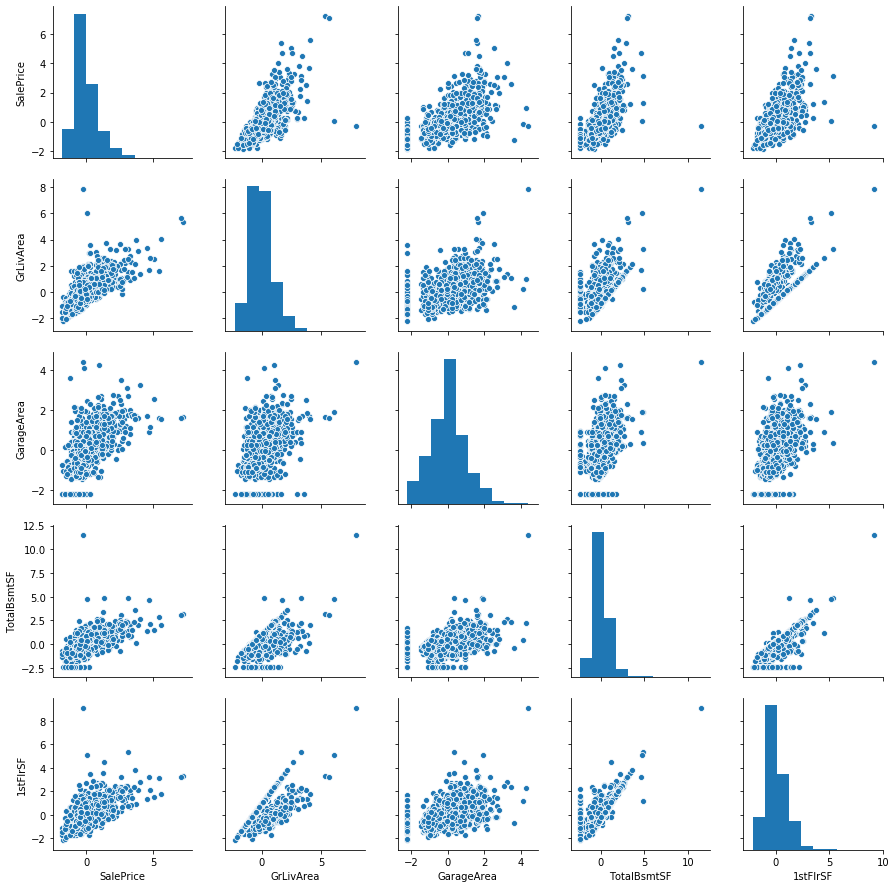

In [23]:
sns.pairplot(scaled[['SalePrice','GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']])

In [24]:
numeric_cols = ['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']

## Extract categorical data

In [25]:
categorical = [column for column in data.columns if column not in scaled.columns]

In [26]:
categorical.append('SalePrice')

In [27]:
data[categorical].select_dtypes(exclude = 'object').corr()

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,EnclosedPorch,MoSold,YrSold,SalePrice
MSSubClass,1.000000,0.032628,-0.059316,0.027850,0.040581,-0.012037,-0.013585,-0.021407,-0.084284
OverallQual,0.032628,1.000000,-0.091932,0.572323,0.550684,-0.113937,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.091932,1.000000,-0.375983,0.073741,0.070356,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.572323,-0.375983,1.000000,0.592855,-0.387268,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.550684,0.073741,0.592855,1.000000,-0.193919,0.021490,0.035743,0.507101
EnclosedPorch,-0.012037,-0.113937,0.070356,-0.387268,-0.193919,1.000000,-0.028887,-0.009916,-0.128578
MoSold,-0.013585,0.070815,-0.003511,0.012398,0.021490,-0.028887,1.000000,-0.145721,0.046432
YrSold,-0.021407,-0.027347,0.043950,-0.013618,0.035743,-0.009916,-0.145721,1.000000,-0.028923
SalePrice,-0.084284,0.790982,-0.077856,0.522897,0.507101,-0.128578,0.046432,-0.028923,1.000000


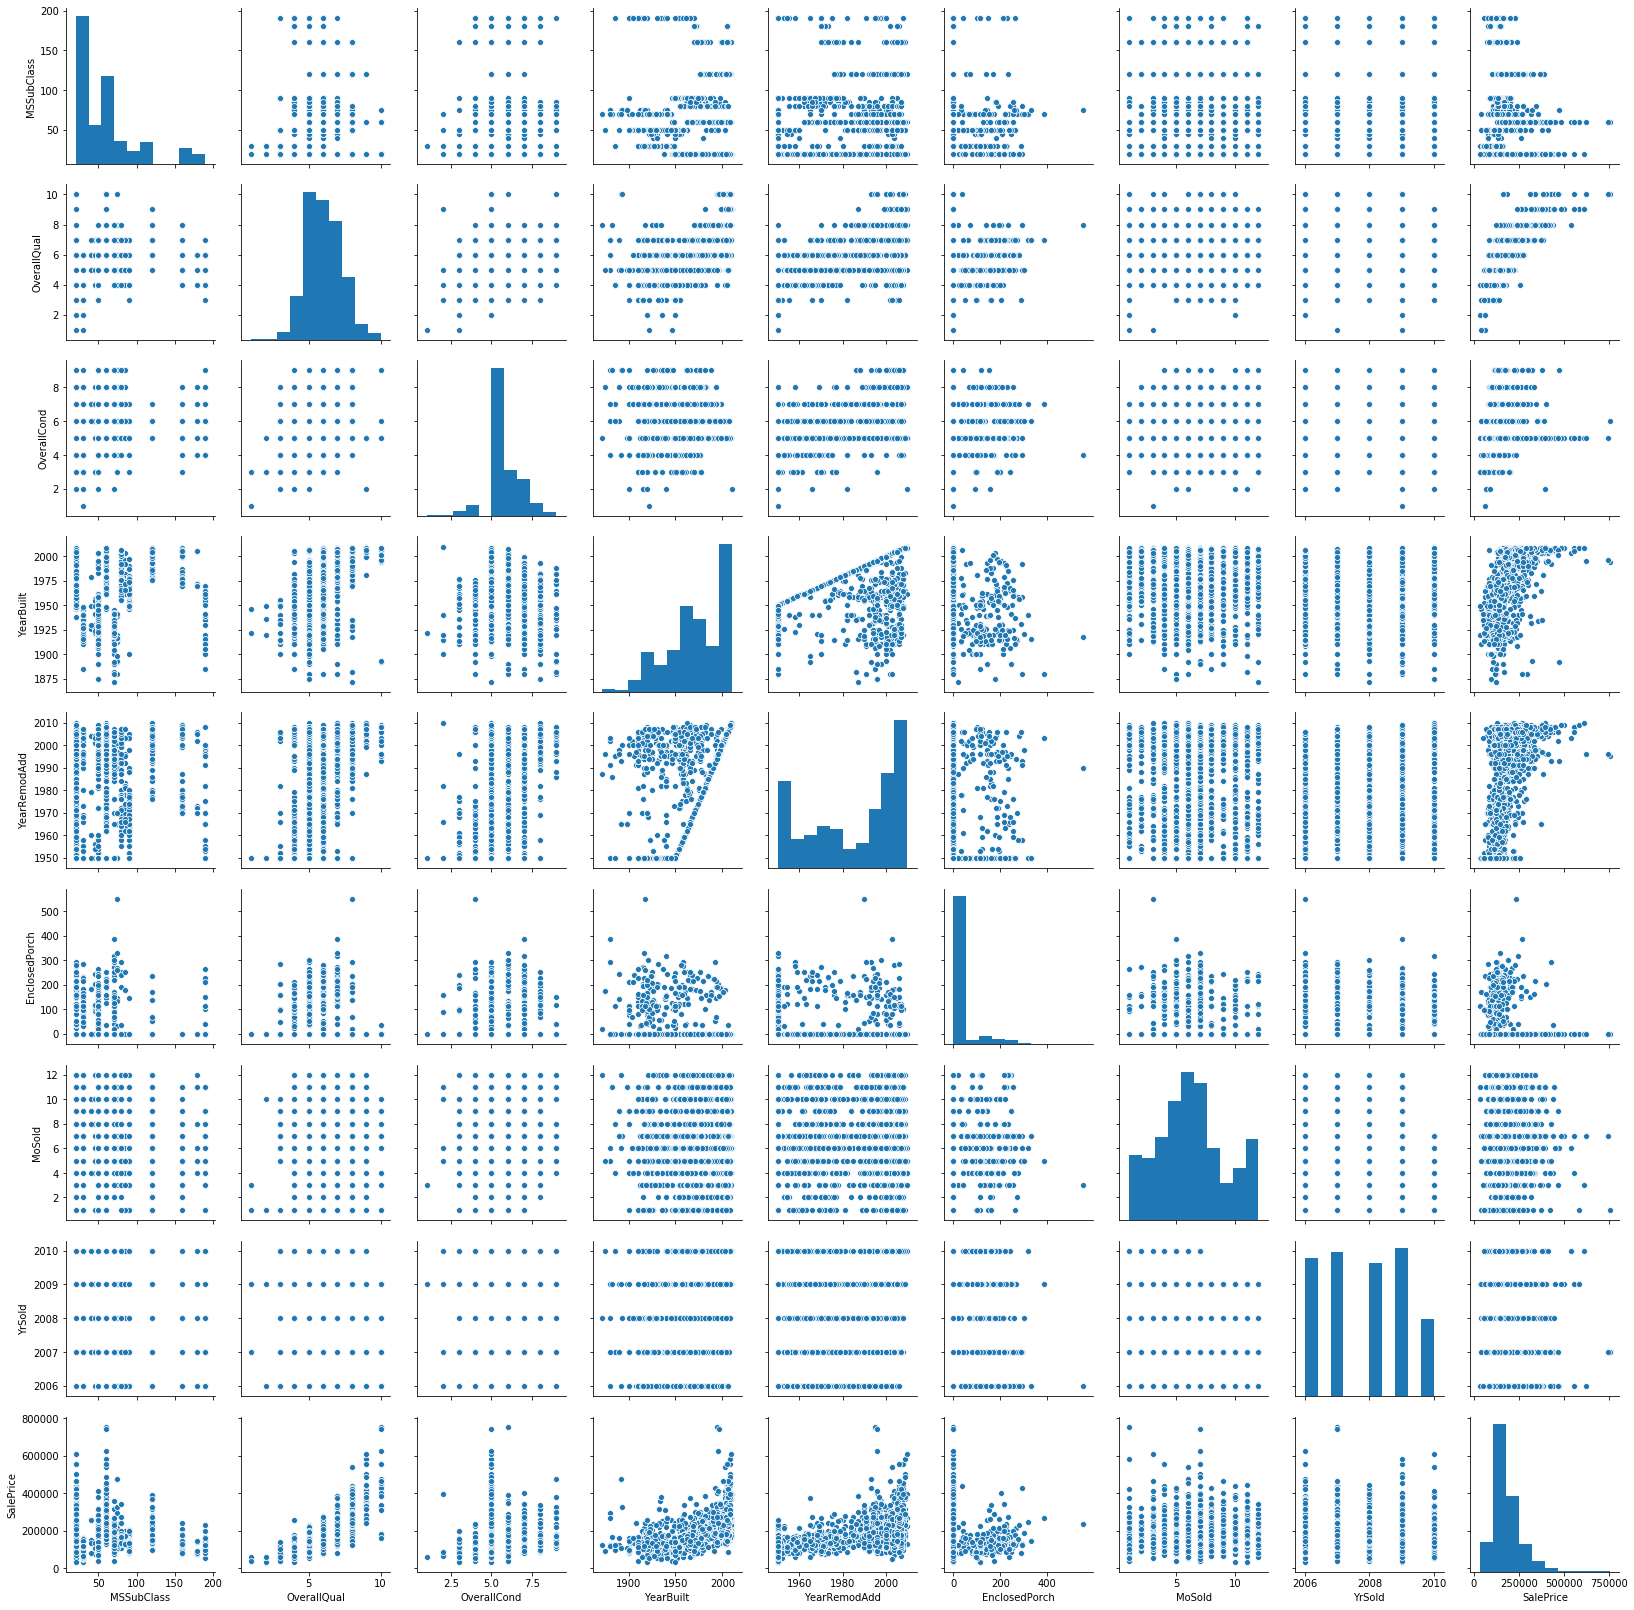

In [28]:
sns.pairplot(data[categorical].select_dtypes(exclude = 'object')) # examine corr matrix between numerical categorical

In [29]:
obj_cat = data[categorical].select_dtypes('object')

In [30]:
# determine how to handle categorical data based on unique values

one_hots = [column for column in obj_cat.columns if len(obj_cat[column].unique()) <= 5] # Candidates for one hot encoding

In [31]:
one_hots

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'BldgType',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'GarageFinish',
 'PavedDrive']

In [32]:
label_encs = [column for column in obj_cat.columns if len(obj_cat[column].unique()) > 5]

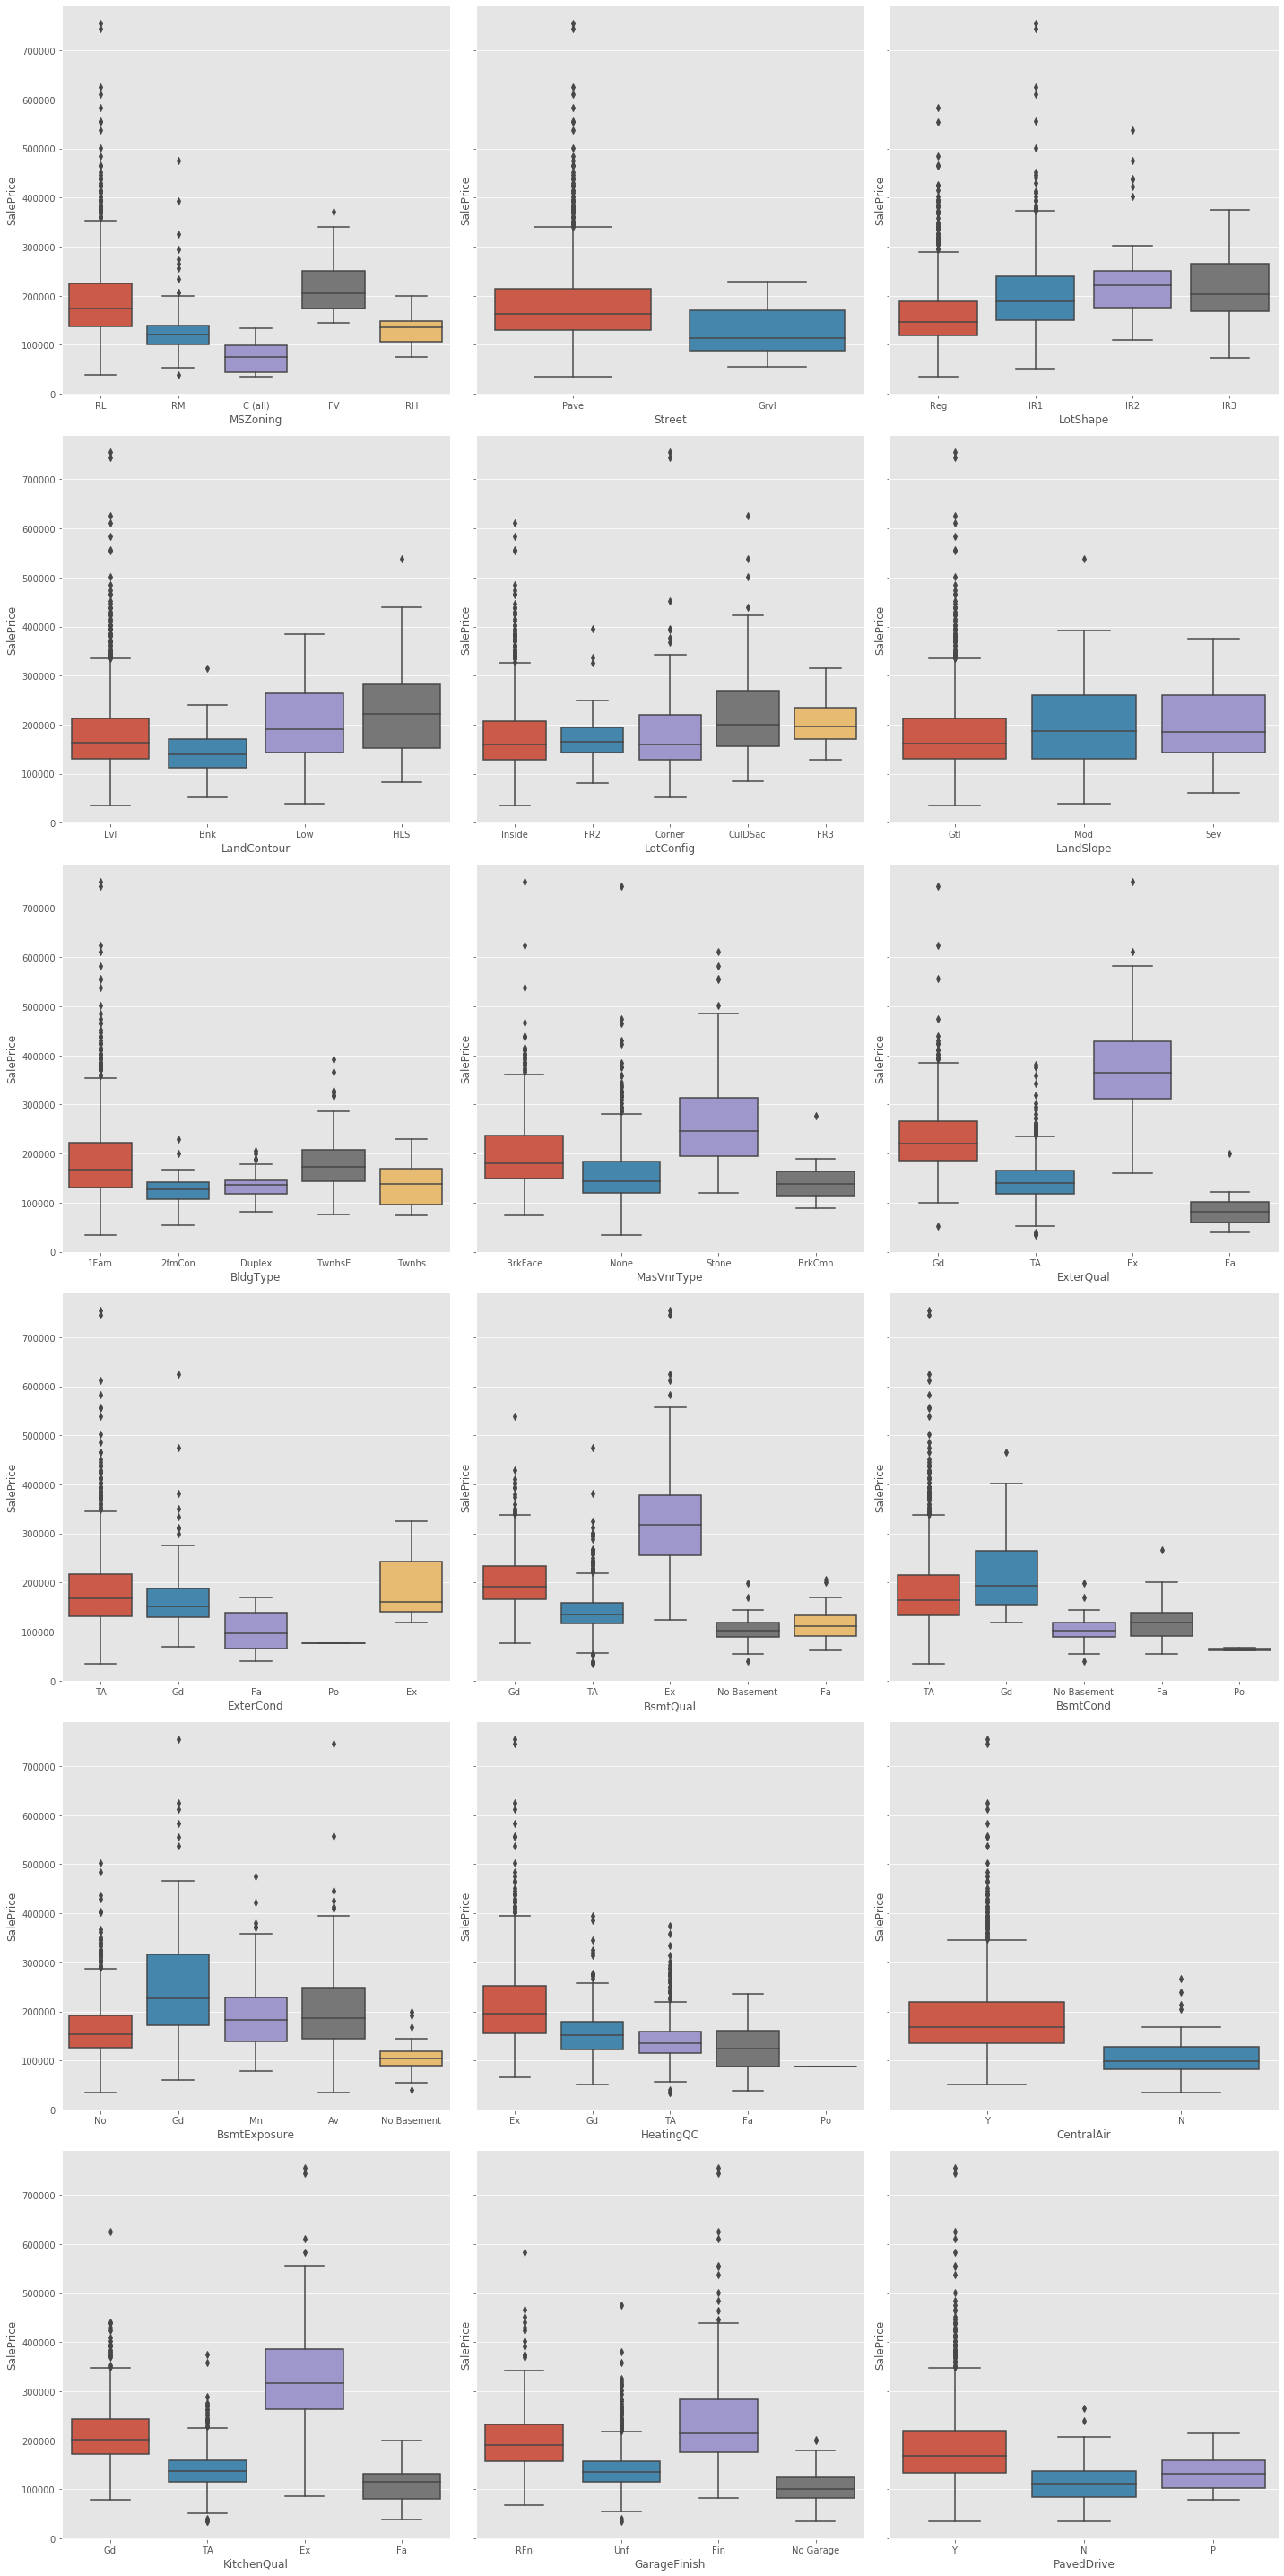

In [33]:
plt.style.use('ggplot')
# Box plot grids for categorical data with <= 5 unique values
fig, axes =plt.subplots(6,3, figsize=(20,40), sharey=True)
axes = axes.flatten()
object_bol = data.dtypes == 'object'
for ax, catplot in zip(axes, one_hots):
    sns.boxplot(y='SalePrice', x=catplot,  data=data, ax=ax)

plt.tight_layout()  
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

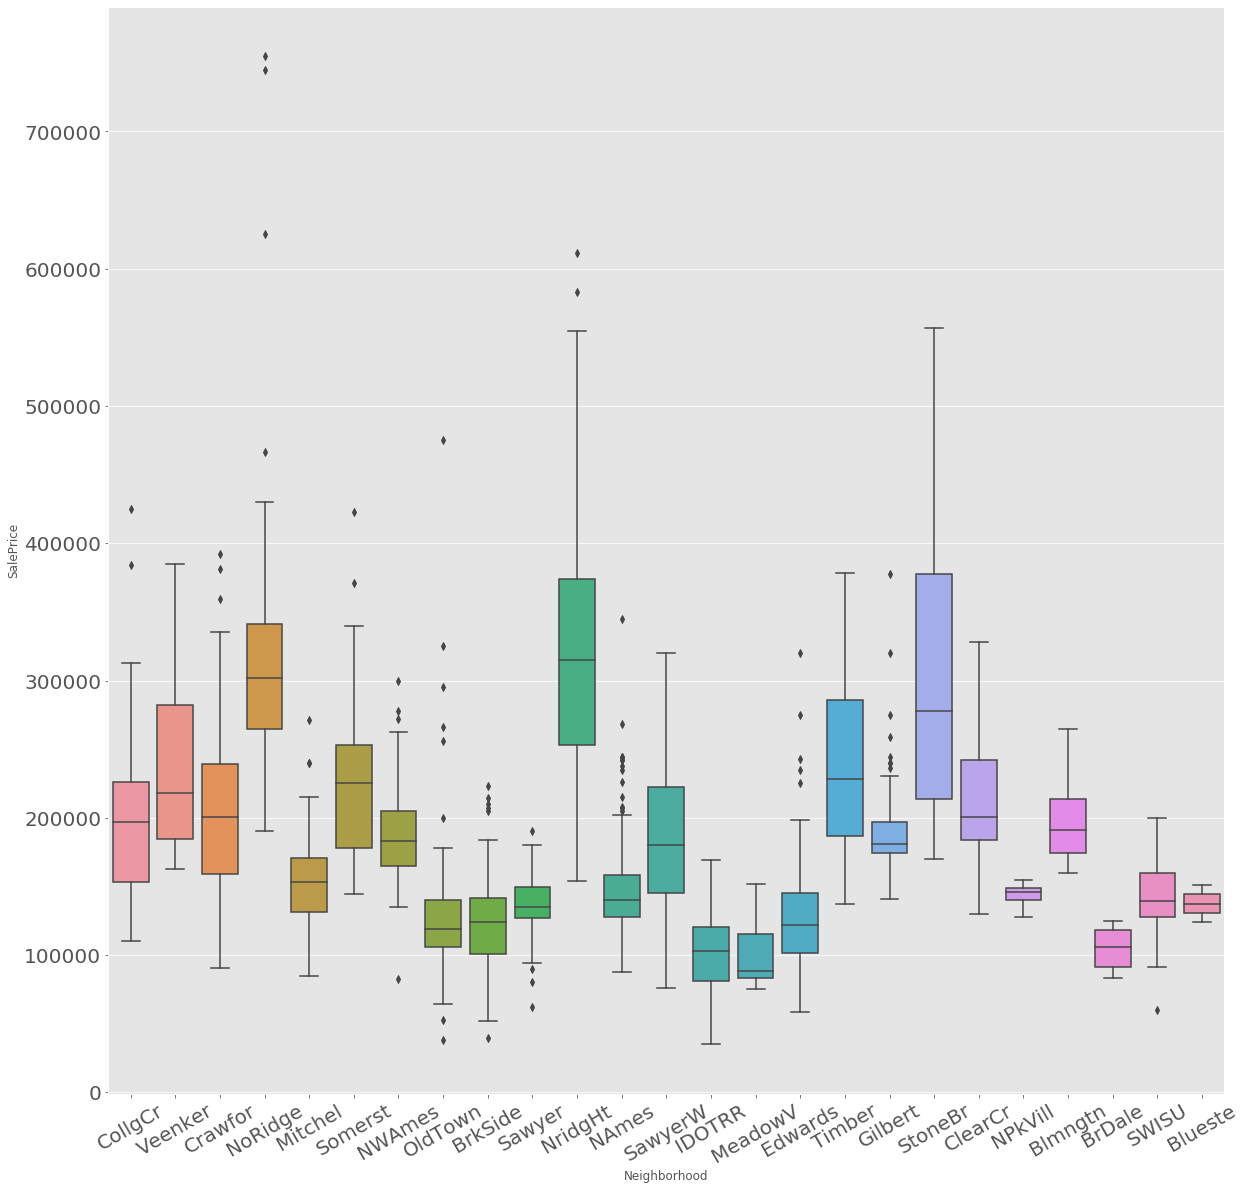

In [34]:
# Reducing factors to Neighborhood
label_encs = ['Neighborhood']
# drop non-influenfential factors from one hots
plt.figure(figsize=(20, 20))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = data)
plt.yticks(fontsize = 20)
plt.xticks(rotation=30, fontsize = 20)

In [35]:
pd.Categorical(data['Neighborhood']).codes

array([ 5, 24,  5, ...,  6, 12,  7], dtype=int8)

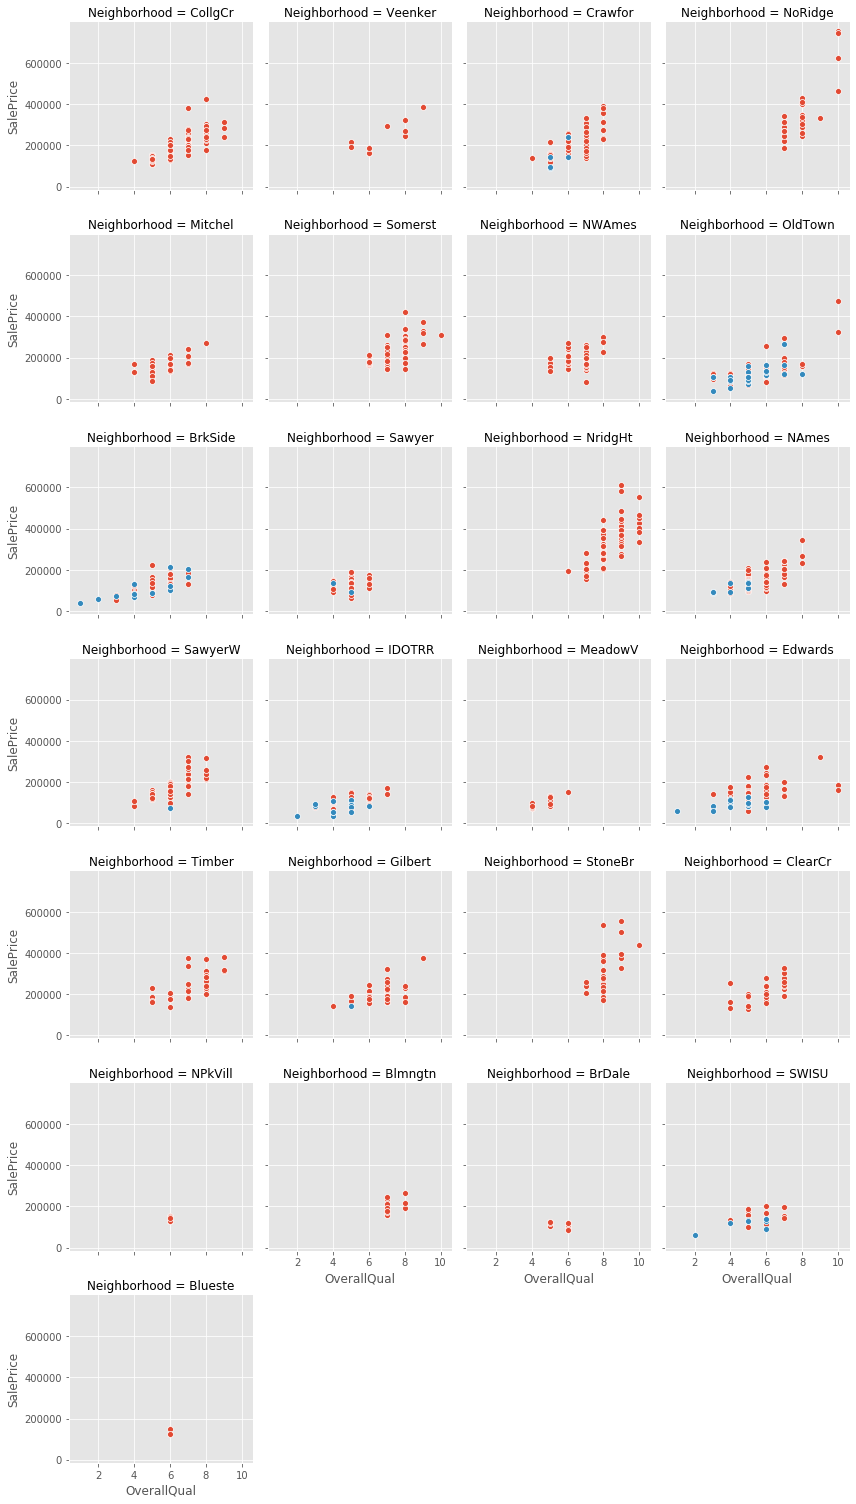

In [36]:
cond_plot = sns.FacetGrid(data=data, col='Neighborhood', hue='CentralAir', col_wrap=4)
cond_plot.map(sns.scatterplot, 'OverallQual', 'SalePrice')

In [37]:
# numeric_cols
dummies = pd.get_dummies(data[one_hots])

X = scaled.join(dummies)
Y = pd.DataFrame(data, columns = ['SalePrice'])# Target


In [38]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X, Y)
lm.intercept_
lm.coef_
predictions = lm.predict(X)

array([[208500.],
       [181500.],
       [223500.],
       ...,
       [266500.],
       [142125.],
       [147500.]])

In [40]:
# R2 from just numerics
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(Y, predictions))
r2_score(Y, predictions)
# Questionable values, likely attributed to overfitting.

4.030020318361145e-20


1.0

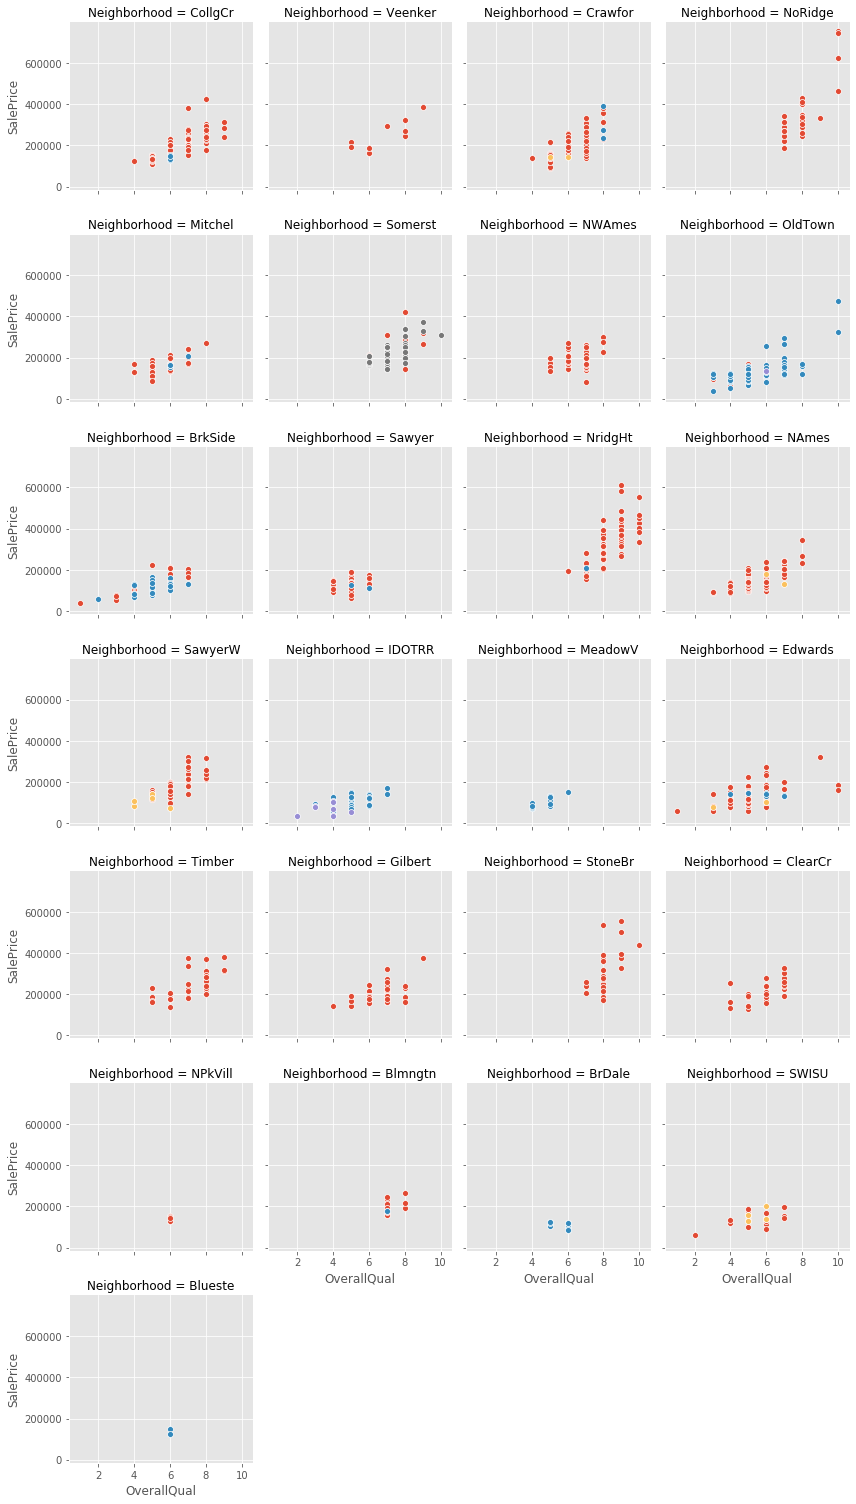

In [41]:
# further examine Neighborhood influence alongside another categorical
cond_plot = sns.FacetGrid(data=data, col='Neighborhood', hue='MSZoning', col_wrap=4)
cond_plot.map(sns.scatterplot, 'OverallQual', 'SalePrice')

In [42]:
X = X.join(pd.DataFrame(pd.Categorical(data['Neighborhood']).codes).rename({0:'Neighborhood'}, axis = 1))

In [43]:
# PCA
X.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,KitchenQual_Gd,KitchenQual_TA,GarageFinish_Fin,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Neighborhood
0,0.212877,-0.207142,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,0.370333,...,1,0,0,0,1,0,0,0,1,5
1,0.645747,-0.091886,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.482512,...,0,1,0,0,1,0,0,0,1,24
2,0.299451,0.073480,0.325915,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,0.515013,...,1,0,0,0,1,0,0,0,1,5
3,0.068587,-0.096897,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,0.383659,...,1,0,0,0,0,1,0,0,1,6
4,0.761179,0.375148,1.366489,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,1.299326,...,1,0,0,0,1,0,0,0,1,15


In [44]:
from statsmodels.multivariate.pca import PCA
pca = PCA(np.array(X), ncomp=3, standardize=False, demean=False, normalize=False)
pca.factors

array([[ 5.70031856,  0.70704584, -1.11290593],
       [24.18488122,  0.18036419,  1.35565182],
       [ 5.64533478,  1.10894848, -0.72740332],
       ...,
       [ 6.56438678,  1.2006819 , -2.81602516],
       [12.46551329, -2.7837546 ,  2.2583366 ],
       [ 7.62929464, -0.90033063,  1.47397551]])

In [45]:
pca

Principal Component Analysis(nobs: 1460, nvar: 97, transformation: None, normalization: False, number of components: 3, SVD, id: 0x7fcdf5a44b38)

In [46]:
data_new = pd.DataFrame(np.dot(X,pca.eigenvecs)) # factors

In [47]:
data_new.head()

,0,1,2
0,5.700319,0.707046,-1.112906
1,24.184881,0.180364,1.355652
2,5.645335,1.108948,-0.727403
3,6.570094,-0.496755,-0.541321
4,15.408447,4.043253,-1.016764


Text(0.5, 1.0, 'PC1 v. PC2')

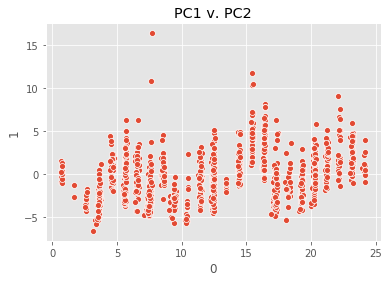

In [58]:
sns.scatterplot(data_new[0],data_new[1])
plt.title('PC1 v. PC2')

Text(0.5, 1.0, 'PC2 v. PC3')

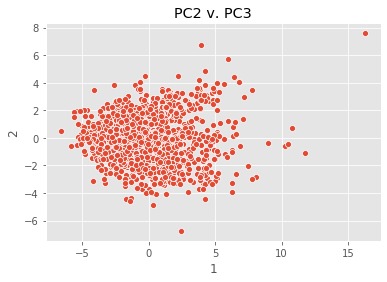

In [56]:
sns.scatterplot(data_new[1],data_new[2])
plt.title('PC2 v. PC3')

Text(0.5, 1.0, 'PC1 v. PC3')

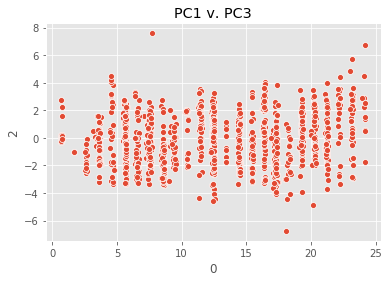

In [60]:
sns.scatterplot(data_new[0],data_new[2])
plt.title('PC1 v. PC3')

In [73]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

pca = PCA()
pca.fit(X)
variations = pca.explained_variance_ratio_*100
variations = np.round(variations, decimals=1)
variations

array([56.4, 10.1,  4.7,  3. ,  2.7,  1.9,  1.6,  1.6,  1.5,  1.4,  1.3,
        1.1,  1.1,  1. ,  0.9,  0.7,  0.7,  0.6,  0.5,  0.5,  0.4,  0.4,
        0.4,  0.4,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.2,  0.2,  0.2,
        0.2,  0.2,  0.2,  0.2,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [74]:
plot_labels = ['PC'+str(i) for i in range(1,len(variations)+1)]

Text(0.5, 1.0, 'PCA Scree Plot')

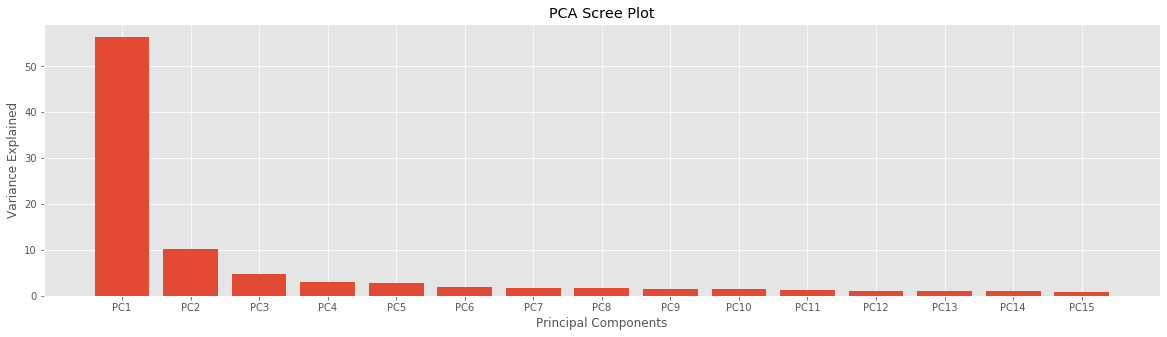

In [75]:
from matplotlib.pyplot import figure
figure(figsize=(20,5))
plt.bar(x = plot_labels[:15], height=variations[:15])
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('PCA Scree Plot')

In [81]:
# Redo PCA scaling using standard scaler and filtered table (Numeric and Categorical)

from sklearn.preprocessing import StandardScaler
dumb_data = pd.get_dummies(data)
data_scaled = dumb_data.drop(['SalePrice'], axis = 1)
Y = dumb_data.SalePrice

In [82]:
scaler = StandardScaler()
scaler.fit(data_scaled)
scaled_data = scaler.transform(data_scaled)

In [84]:
pca_hp = PCA(30)
X = pca_hp.fit_transform(scaled_data)

In [90]:
np.exp(pca_hp.explained_variance_ratio_)

array([1.05244512, 1.02455982, 1.02024047, 1.01822111, 1.01717531,
       1.01537087, 1.01267967, 1.01233699, 1.01002238, 1.00983003,
       1.00950503, 1.00873579, 1.00833692, 1.0081772 , 1.00796618,
       1.0077915 , 1.00758379, 1.0074215 , 1.00723819, 1.00695651,
       1.00688614, 1.00663629, 1.0065632 , 1.00651127, 1.00635145,
       1.00630684, 1.00618981, 1.00603173, 1.00593705, 1.00589624])

In [92]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [93]:
predictions = linear.predict(X)

In [95]:
r2_score(Y, predictions)

0.8238027495350679